In [38]:
import pandas as pd
import numpy as np

In [2]:
#convert tsv file to csv
tsvFile = "en.openfoodfacts.org.products.tsv"
csv_table=pd.read_table(tsvFile,sep='\t')
csv_table.to_csv('Food.csv',index=False)

/Users/chrisdrakeford/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,36,37,38,39,48) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [88]:
pd.set_option('display.max_columns', None)

In [5]:
#read in csv file
food=pd.read_csv("Food.csv")

/Users/chrisdrakeford/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,36,37,38,39,48) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [90]:
food.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,main_category,main_category_en,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","To be completed,Nutrition facts to be complete...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,United States,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN

In [89]:
food.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity',
       ...
       'fruits-vegetables-nuts_100g', 'fruits-vegetables-nuts-estimate_100g',
       'collagen-meat-protein-ratio_100g', 'cocoa_100g', 'chlorophyl_100g',
       'carbon-footprint_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'glycemic-index_100g',
       'water-hardness_100g'],
      dtype='object', length=163)

In [91]:
#create dataframe with ideal features
calories = food[['product_name','energy_100g','serving_size','fat_100g','saturated-fat_100g','carbohydrates_100g','sugars_100g','fiber_100g','proteins_100g']]

In [92]:
calories = calories.drop_duplicates(subset=['product_name'],keep='first')

In [93]:
calories.dtypes

product_name           object
energy_100g           float64
serving_size           object
fat_100g              float64
saturated-fat_100g    float64
carbohydrates_100g    float64
sugars_100g           float64
fiber_100g            float64
proteins_100g         float64
dtype: object

In [94]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356027 entries, 0 to 356026
Columns: 163 entries, code to water-hardness_100g
dtypes: float64(107), object(56)
memory usage: 442.8+ MB


In [95]:
calories.head()

,product_name,energy_100g,serving_size,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g
0,Farine de blé noir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Banana Chips Sweetened (Whole),2243.0,28 g (1 ONZ),28.57,28.57,64.29,14.29,3.6,3.57
2,Peanuts,1941.0,28 g (0.25 cup),17.86,0.00,60.71,17.86,7.1,17.86
3,Organic Salted Nut Mix,2540.0,28 g (0.25 cup),57.14,5.36,17.86,3.57,7.1,17.86
4,Organic Polenta,1552.0,35 g (0.25 cup),1.43,NaN,77.14,NaN,5.7,8.57


In [96]:
#drop rows that are Nan or contain a substring in drop values regex could of been a better solution once cl was separated from ml
calories = calories.dropna()
dropvalues = ["verre","fl","canette","cookies","Pieces","oz","'","cup","brikette","briquette","bol","brique","de",",","soupe","bouteille","Metric","biscottes","/","Cont","cannette"]
calories = calories[~calories.serving_size.str.contains('|'.join(dropvalues))]


In [97]:
calories['serving_size'].unique()

array(['28 g (1 ONZ)', '40 g (40 g)', '45 g (45 GRM)', ...,
       '100 g (6 MUSSELS PER SERVE) | (APPROX)', '22 g (3 PCS)',
       '25 g (bun)'], dtype=object)

In [98]:
calories['serving_size'] = calories['serving_size'].str.split('g|G|ml|ML').str[0]

In [99]:
clSplit=calories['serving_size'][calories['serving_size'].str.contains('cl')]

In [100]:
clSplit=clSplit.str.split('cl').str[0]
clSplit=clSplit.astype(float)
clSplit=clSplit*10

In [101]:
clSplit.head()

185       330.0
27370     200.0
87400     330.0
124198     30.0
177374    400.0
Name: serving_size, dtype: float64

In [102]:
clSplit=clSplit.astype(str)

In [103]:
calories['serving_size'].loc[clSplit.index]=clSplit

/Users/chrisdrakeford/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [104]:
calories['serving_size']=calories.serving_size.str.replace("[^0-9]","",regex=True)

In [105]:
calories['serving_size'] = calories.serving_size.astype(str).str.strip().replace('',0).astype(float)

In [106]:
calories['kcal_100g'] = calories['energy_100g']/4.184

In [107]:
calories["kcal_per_serving"] = (calories['serving_size'] / 100) * (calories['kcal_100g'])

In [108]:
calories.describe()

,energy_100g,serving_size,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,kcal_100g,kcal_per_serving
count,79238.000000,7.923800e+04,79238.000000,79238.000000,79238.000000,79238.000000,79238.000000,79238.000000,79238.000000,7.923800e+04
mean,1289.753339,4.069563e+06,14.188180,5.356911,37.920744,17.651798,2.768122,7.705090,308.258446,9.797383e+06
std,792.468259,1.122090e+09,14.935011,7.335144,27.821832,20.833950,4.253015,7.736773,189.404460,2.630858e+09
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-6.250000,0.000000,0.000000,0.000000,0.000000e+00
25%,669.000000,2.800000e+01,1.800000,0.000000,11.000000,1.770000,0.000000,2.630000,159.894837,8.000478e+01
50%,1360.000000,4.000000e+01,10.000000,2.500000,38.050000,7.140000,1.500000,6.000000,325.047801,1.304971e+02
75%,1830.000000,9.900000e+01,22.500000,7.960000,61.900000,30.000000,3.600000,10.300000,437.380497,2.000000e+02
max,94140.000000,3.157895e+11,100.000000,100.000000,139.000000,104.000000,100.000000,100.000000,22500.000000,7.396599e+11


In [109]:
calories['kcal_100g']= calories['kcal_100g'].astype(int)
calories["kcal_per_serving"]= calories["kcal_per_serving"].astype(int)

In [110]:
calories.to_csv("FoodData.csv")

<AxesSubplot:>

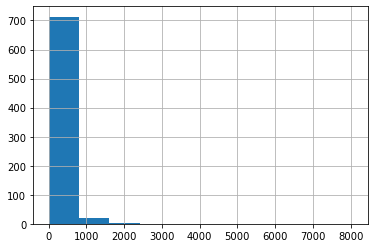

In [111]:
calories.serving_size.value_counts().hist()

<AxesSubplot:>

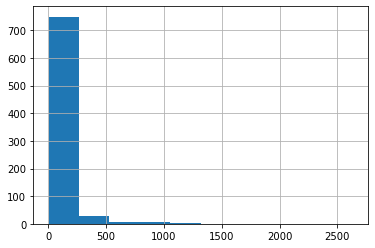

In [112]:
calories.kcal_100g.value_counts().hist()

In [113]:
calOutlyer = calories.loc[calories['serving_size'] >= 1000]#.to_csv("outlyers.csv", index=True)

In [114]:
clSplit.to_csv("clOutLyers.csv",index=False)

In [115]:
positiveOutlyer=calOutlyer.loc[calOutlyer["product_name"].str.contains("7Up|Hein|Coca-Cola")]

In [116]:
positiveOutlyer["serving_size"]=positiveOutlyer["serving_size"]/10

<ipython-input-116-36537c990720>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positiveOutlyer["serving_size"]=positiveOutlyer["serving_size"]/10


In [117]:
positiveOutlyer["kcal_per_serving"]=positiveOutlyer["kcal_per_serving"]/10

<ipython-input-117-ad51ff5d7a52>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positiveOutlyer["kcal_per_serving"]=positiveOutlyer["kcal_per_serving"]/10


In [118]:
positiveOutlyer.head()

,product_name,energy_100g,serving_size,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,kcal_100g,kcal_per_serving
177375,Moyen Coca-Cola,178.0,400.0,0.0,0.0,11.0,11.0,0.0,0.0,42,170.1
308297,Coca-Cola cherry,180.0,330.0,0.0,0.0,10.6,10.6,0.0,0.0,43,141.9
308531,Coca-Cola Zero Cherry,1.4,330.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.1


In [119]:
calories = calories[~calories.isin(calOutlyer)].dropna()

In [120]:
frames = [calories, positiveOutlyer]

In [121]:
calories = pd.concat(frames)

In [122]:
calories

,product_name,energy_100g,serving_size,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,kcal_100g,kcal_per_serving
1,Banana Chips Sweetened (Whole),2243.0,28.0,28.57,28.57,64.29,14.29,3.6,3.57,536.0,150.0
8,Organic Dark Chocolate Minis,2406.0,40.0,37.50,22.50,55.00,42.50,7.5,5.00,575.0,230.0
24,Peanut Butter Power Chews,1954.0,45.0,20.00,2.22,60.00,33.33,4.4,8.89,467.0,210.0
27,Roasted Salted Black Pepper Cashews,2372.0,30.0,46.67,8.33,30.00,6.67,3.3,16.67,566.0,170.0
28,Thai Curry Roasted Cashews,2372.0,30.0,43.33,6.67,30.00,6.67,3.3,16.67,566.0,170.0
...,...,...,...,...,...,...,...,...,...,...,...
355968,Organic Z Bar,1393.0,36.0,9.72,2.78,61.11,30.56,8.3,5.56,332.0,119.0
355985,Natural Cassava,1477.0,85.0,0.00,0.00,87.06,2.35,4.7,1.18,353.0,300.0
177375,Moyen Coca-Cola,178.0,400.0,0.00,0.00,11.00,11.00,0.0,0.00,42.0,170.1
308297,Coca-Cola cherry,180.0,330.0,0.00,0.00,10.60,10.60,0.0,0.00,43.0,141.9


In [123]:
calories.head()

,product_name,energy_100g,serving_size,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,kcal_100g,kcal_per_serving
1,Banana Chips Sweetened (Whole),2243.0,28.0,28.57,28.57,64.29,14.29,3.6,3.57,536.0,150.0
8,Organic Dark Chocolate Minis,2406.0,40.0,37.50,22.50,55.00,42.50,7.5,5.00,575.0,230.0
24,Peanut Butter Power Chews,1954.0,45.0,20.00,2.22,60.00,33.33,4.4,8.89,467.0,210.0
27,Roasted Salted Black Pepper Cashews,2372.0,30.0,46.67,8.33,30.00,6.67,3.3,16.67,566.0,170.0
28,Thai Curry Roasted Cashews,2372.0,30.0,43.33,6.67,30.00,6.67,3.3,16.67,566.0,170.0
